In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

In [2]:
def analyze_categorial_column(column, title):
  """
    Небольшая описательная статистика по категориальной колонке
  """
  "Выводим количество вхождений каждого признака"
  value_counts = column.value_counts()
  unique_values = value_counts.index.tolist()
  counts = value_counts.values.tolist()
  for i, (value, count) in enumerate(zip(unique_values, counts), 1):
      print(f"{i}. '{value}': {count} записей")

  "pie-plot"
  fig, ax = plt.subplots(1, 1, figsize=(6, 6))
  colors_pie = sns.color_palette("Set2", len(unique_values))
  labels_pie = [f'{val}\n({count/len(column)*100:.1f}%)'
                for val, count in zip(unique_values, counts)]
  wedges, texts, autotexts = ax.pie(counts, labels=labels_pie, colors=colors_pie,
                                    autopct='', startangle=90,
                                    textprops={'fontsize': 10})
  for text in texts:
      text.set_fontweight('bold')
  ax.set_title(title,
                fontsize=14, fontweight='bold', pad=20)
  ax.axis('equal')
  plt.tight_layout()
  plt.show()

In [3]:
def analyze_numerical_column(column):
  "Гистограмма"
  sns.histplot(data=salary, bins=10, kde=True, alpha=0.7)
  plt.axvline(salary.mean(), color='red', linestyle='--', linewidth=2,
            label=f'Среднее: {salary.mean():.2f}')
  plt.axvline(salary.median(), color='green', linestyle='--', linewidth=2,
            label=f'Медиана: {salary.median():.2f}')
  plt.legend(fontsize=10)
  plt.grid(True, alpha=0.3)
  plt.show()

  print("\nВыборочные статистики:")
  print(salary.describe())

  print(f"\nЧисло уникальных значений: \t{len(salary.unique())}")

# **Коэффициент корреляции Пирсона**

> *Шкалой отношений* называют такую шкалу с непрерывным множеством числовых значений, в которой о двух сопоставляемых объектах можно сказать не только,
одинаковы они или различны, не только, в каком из них признак выражен сильнее, но и во сколько раз сильнее этот признак выражен.

In [4]:
!gdown 1Qzjr5lyWbfX9gkZI9l36i4YRd4aK5cL6
!unzip ./height_weight.zip
!rm ./height_weight.zip
!mv ./SOCR-HeightWeight.csv ./hw.csv

Downloading...
From: https://drive.google.com/uc?id=1Qzjr5lyWbfX9gkZI9l36i4YRd4aK5cL6
To: /content/height_weight.zip
100% 250k/250k [00:00<00:00, 85.9MB/s]
Archive:  ./height_weight.zip
  inflating: SOCR-HeightWeight.csv   


In [5]:
"Посмотрим на данные роста и веса"
data_hw = pd.read_csv("./hw.csv")
print(data_hw.head(3))

height = data_hw['Height(Inches)']
weight = data_hw['Weight(Pounds)']

   Index  Height(Inches)  Weight(Pounds)
0      1        65.78331        112.9925
1      2        71.51521        136.4873
2      3        69.39874        153.0269


> Предположим, что есть генеральная совокупность, каждый элемент которой обладает двумя количественными признаками.
> Если случайным образом извлекать объекты, то пусть $\xi$ — значение, которое принимает первый признак, $\eta$ — значение, которое принимает второй признак.
> Величины $\xi$ и $\eta$ — случайные. Корреляция случайных величин $\xi$ и $\eta$ выражается следующей формулой:
>
> \begin{align*}
  \rho(\xi, \eta) = \frac{\text{cov}(\xi, \eta)}{\sqrt{D\xi} \sqrt{D\eta}}.
\end{align*}

In [6]:
r, _ = stats.pearsonr(height, weight)
print(f'Коэфиициент корреляции Пирсона: r = {r:.3f}')

Коэфиициент корреляции Пирсона: r = 0.503


> Если случайные величины $\xi$ и $\eta$ независимы, то корреляция равна нулю. Обратное утверждение, вообще говоря, неверно.
> Если $\rho = 1$, то существует положительная линейная связь между величинами $\xi$ и $\eta$ такая, что $\eta  = a + b \xi$, $b > 0$.
>Если $\rho = −1$, то существует линейная связь между величинами $\xi$ и
$\eta$ такая, что $\eta = a + b \xi$, $b < 0$.
> Если вектор $(\xi, \eta)^T$ подчиняется совместному нормальному распределению с вектором математических ожиданий $a = (a_1 , a_2)^T$ и ковариационной матрицей
>
> \begin{align*}
\begin{pmatrix}
\sigma_1^2 & \sigma_1\sigma_2\rho \\
\sigma_1\sigma_2\rho & \sigma_2^2
\end{pmatrix}
\end{align*}
> то корреляция случайных величин $\xi$ и $\eta$ равна нулю тогда и только тогда, когда эти случайные величины взаимно независимы, $\sigma_{1}^2 = D \xi$, $\sigma_2^2 = D \eta$.
>
> Получим оценку коэффициента корреляции — выборочный коэффициент корреляции Пирсона, который определяется выражением:
>
> \begin{align*}
  r_{X,Y} = \frac{\frac{1}{n} \sum_{i=1}^n (X_i - \bar{X})(Y_i - \bar{Y})}{\sqrt{s_X s_Y}}.
\end{align*}

> **Вопрос**: что будет, если одно из измерений окажется выбросом? Что можно сделать в этом случае?

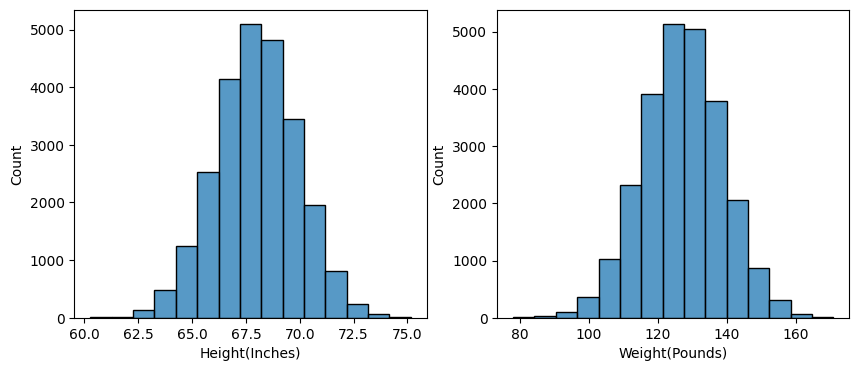

In [7]:
"Посмотрим визуально на данные"
fig, axes = plt.subplots(1, 2, figsize=(10,4))
sns.histplot(data=height, ax=axes[0], bins=15)
sns.histplot(data=weight, ax=axes[1], bins=15)
plt.show()

In [8]:
"Проверим нормальность: при очень больших n лучше сравнивать асиметрию и эксцесс"
print("Height")
_, jb_p = stats.jarque_bera(height)
print(f"Тест Жарка-Бера: p-value = {jb_p:.4f}")

print("\nWeight")
_, jb_p = stats.jarque_bera(weight)
print(f"Тест Жарка-Бера: p-value = {jb_p:.4f}")

Height
Тест Жарка-Бера: p-value = 0.4872

Weight
Тест Жарка-Бера: p-value = 0.0869


> Сформулируем гипотезы:
> - $ H_0: \rho = 0 $ -- гипотеза о независимости.
> - $ H_1: \rho > 0 $.
> - $ H'_1: \rho < 0 $.
> - $ H''_1: \rho \neq 0 $ -- двусторонняя альтернатива.
>
> Справедливо утверждение. При сделанных предположениях о распределении случайного вектора $(\xi, \eta)^T$, статистика
\begin{equation*}
t =  \frac{r_{X,Y}\sqrt{n - 2}}{\sqrt{1 - r_{XY}^2}}
\end{equation*}
> при выполнении гипотезы $ H_0 $ подчиняется распределению Стьюдента с $n - 2$ степенями свободы.
> Ключевое предположение здесь -- нормальность данных.

In [9]:
r, p_value = stats.pearsonr(height, weight)
print(f'Коэфиициент корреляции Пирсона: r = {r:.3f}')
print(f'Тест на независимость: p-value = {p_value:.6f}')

Коэфиициент корреляции Пирсона: r = 0.503
Тест на независимость: p-value = 0.000000


> При больших $n$ тест можно использовать, чтобы показывать некоррелированность и в отсутствие предположения о нормальности.
> Однако о независимости случайных величин речи уже идти не может.

## Косинусное расстояние как коэффициент корреляции

> Пусть дана выборка размера $n$.
> Выборочный коэффициент корреляции Пирсона — это косинусная близость между центрированными версиями векторов.

> Если среднее пренебрижимо мало, то мы можем смотреть на косинусное расстояние между двумя векторами как на коэффициент корреляции между соответствующими выборками

> Аналогия имеет смысл при рассмотрении коэффициента корреляции, потому что он инвариантен к перестановке индексов у двух векторов одновременно.

> Вопрос: какую информацию мы теряем при таком подходе?

In [10]:
import kagglehub

"Загружаем датасет"
path = kagglehub.dataset_download("anzerone/clickbait-titles-ru")

"Открываем датасет"
data = pd.read_csv(path + "/titles_data.csv", delimiter = ';')
news = data[data['target'] == 0]['titles']
news.head(5)

100%|██████████| 113k/113k [00:00<00:00, 40.3MB/s]

Extracting files...


,titles
1599,"Зеленский будет умолять Москву, чтобы его прос..."
1600,В Кремле предупредили Чехию об ответе на замор...
1601,Песков ответил на вопрос о словах Байдена про ...
1602,Путин проведет оперативное совещание с членами...
1603,"В Кремле подтвердили, что ждут Рахмона в Росси..."


In [ ]:
from sentence_transformers import SentenceTransformer

# Загрузка модели
model = SentenceTransformer('cointegrated/rubert-tiny2')

In [12]:
embeddings = model.encode(news.to_list())

In [13]:
stats.shapiro(embeddings[5])

ShapiroResult(statistic=np.float64(0.8899465572703508), pvalue=np.float64(3.166556581035164e-14))

In [14]:
embeddings[0].sum()

np.float32(0.66205496)

In [15]:
print(f'{np.array([embeddings[i].mean() for i in range(len(embeddings))]).max():.3f}')

0.003


In [16]:
np.array([embeddings[i].max() for i in range(len(embeddings))]).max()

np.float32(0.2788515)

In [17]:
np.array([embeddings[i].min() for i in range(len(embeddings))]).min()

np.float32(-0.5561051)

In [18]:
embeddings.shape

(1599, 312)

> Предположение: эмбединги схожих тем новостей представляют собой выборки из схожих распределений.

In [19]:
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage

In [20]:
cosine_dist = 1 - cosine_similarity(embeddings)
Z = linkage(cosine_dist, method='ward')

In [21]:
n_clusters = 10

In [22]:
from scipy.cluster.hierarchy import fcluster

clusters = fcluster(Z, n_clusters, criterion='maxclust')

In [23]:
news[clusters == 7].head(20)

,titles
1930,Эксперт рассказала об итогах исследования фено...
1945,"В России придумали, как дать вторую жизнь упак..."
2112,"В России придумали, как дать вторую жизнь упак..."
2113,"Российские ученые придумали, как очистить воду..."
2115,В России создали уникальную нейросеть для опре...
2119,Российские ученые придумали инновационный саха...
2125,Новые свойства жидких кристаллов открыли в России
2127,"Российские ученые создали девайс, снижающий тр..."
2131,"В России придумали, как из микроводорослей пол..."
2132,В России создали новый эффективный метод выдел...


# **Коэффициенты ранговой корреляции**

> Шкалы, в которых существенен лишь взаимный порядок, в котором следуют результаты измерений, а не их количественные значения, называют *порядковыми* или *ординальными* шкалами.

> Пусть имеется два признака A и B, между которыми мы хотим установить наличие зависимости или независимости.
Пусть $(X_1, \dots , X_n)$ — измерение степени выраженности
признака $A$, $(Y_1, \dots , Y_n)$ — измерение степени выраженности признака $B$.
Каждый объект характеризует пара $(X_i, Y_j)$, где
$1 \leq i \leq n, 1 \leq j \leq n$.

> Вопрос: что будет если одно из данных будет иметь выброс?

> Вопрос: как можно избавиться от повторяющихся рангов, если так вышло, что некоторые значения признака совпали?

In [24]:
"Очень простой пример"
n = 6

sample_a = [1, 2, 3, 4, 5, 6]
rank_a = stats.rankdata(sample_a)
print(rank_a)

sample_b = [1, 100, 10, 10**3, 10**5, 10**4]
rank_b = stats.rankdata(sample_b)
print(rank_b)

[1. 2. 3. 4. 5. 6.]
[1. 3. 2. 4. 6. 5.]


## Коэффициент ранговой корреляции Спирмена

> Проранжируем наблюдения $X_1, \dots , X_n$ и $Y_1, \dots , Y_n$, ранги которых будут соответственно обозначаться $r_1, \dots , r_n$ и $s_1, \dots , s_n$, то есть $r_i$ — номер наблюдения $X_i$ в вариационном ряду, построенном по наблюдениям $X_1, \dots , X_n$. Аналогично $s_i$ — номер наблюдения $Y_i$ в вариационном ряду, построенном по наблюдениям $Y_1, \dots , Y_n$.
> Будем предполагать, что в выборках нет повторяющихся элементов.
> Назовём *статистикой Спирмена* выражение:
> \begin{equation}
  S = \sum_{j=1}^{n}(s_i - r_i)^2
\end{equation}
>
> *Коэффициентом ранговой корреляции Спирмена* назовём выражение
> \begin{equation}
  \rho = 1 - \frac{6 S}{n(n^2 - 1)}
\end{equation}
> Нетрудно показать, что $|\rho| \leq 1$. Если $|\rho| = 1$, то это означает полную зависимость одного признака от другого, либо, иначе говоря, полную предсказуемость одной выборки по другой.
> Если ранги признаков совпадают, то $\rho = 1$. Если последовательности рангов полностью противоположны, то $\rho = −1$. Оба случая означают полную предсказуемость одной ранговой последовательности по другой, или, другими словами, полную зависимость признаков $A$ и $B$.

In [25]:
"Посчитаем статистику"
S = sum([(r_a - r_b)**2 for r_a, r_b in zip(rank_a, rank_b)])
rho = 1 - 6 * S / (n*(n**2 - 1))
print(f'Коэфиициент корреляции Спирмена: rho = {rho:.3f}')

Коэфиициент корреляции Спирмена: rho = 0.886


> На основе статистики Спирмена можно предложить тест проверяющий следующую гипотезу.
>
>\begin{align*}
  &H_0: \text{между признаками $A$ и $B$ нет монотонной зависимости}\\
  &H_1: \text{имеется монотонная связь признаков}
\end{align*}
>
> Если гипотеза $H_0$ справедлива, то распределение статистики $\rho$ симметрично и концентрируется около нуля.
> При наличии зависимости распределение окажется другим.
> Для монотонной положительной зависимости распределение $\rho$ сдвинуто вправо, для монотонной отрицательной — влево.

In [26]:
"Используем встроенный метод"
rho, p_value = stats.spearmanr(sample_a, sample_b)
print(f'Коэфиициент корреляции Спирмена: rho = {rho:.3f}')
print(f'Тест Спирмена: p-value = {p_value:.6f}')

Коэфиициент корреляции Спирмена: rho = 0.886
Тест Спирмена: p-value = 0.018845


In [27]:
"Сравним с коэффициентом корреляции Пирсона"
r, _ = stats.pearsonr(sample_a, sample_b)
print(f'Коэфиициент корреляции Пирсона: r = {r:.3f}')

Коэфиициент корреляции Пирсона: r = 0.467


>Ключевое предположение: генеральная совокупность распределена абсолютно-непрерывно. То есть, почти наверное в выборке нет повторов.
>
>Это нужно для того, чтобы статистика Спирмена (впрочем, как и любая другая ранговая статистика) была распределена согласно известному закону.
>
>На практике, это означает, что если вы примените ранговый критерий к выборке в которой много повторяющихся значений, то на выходе вы получите не оценку вероятности, а нечто другое.
>
>Если повторов не много, то на практике применяют *поправки* к статистике. Стоит внимательно читать, какие дополнительные ограничения на выборку накладывают те или иные поправки

## Коэффициент ранговой корреляции Кенделла

> Коэффициент ранговой корреляции Кенделла применяется для решения тех же задач, что и коэффициент Спирмена.
> Проверяются те же гипотезы, и алгоритм проверки такой же, как и при использовании коэффициента Спирмена.
> Разница лишь в том, что используются статистические таблицы для распределения коэффициента Кенделла.
> Для вычисления статистики Кенделла достаточно посчитать количество
инверсий (минимальное число перестановок соседних объектов), которое надо сделать для того, чтобы одно упорядочение объектов превратилось в другое.
>
> Пусть есть пары наблюдений каждого из признаков $(X_1, Y_1 ), \dots, (X_n , Y_n)$.
> Упорядочим наблюдения первого признака и проранжируем их рангами от $1$ до $n$.
> Затем ранжируем последовательность наблюдений второго признака, при этом объекты перенумерованы в соответствии с рангами первой совокупности.
> Пусть во втором наборе приписаны каждому наблюдению ранги $z_1, \dots, z_n$,то есть теперь все объекты характеризуются парами рангов: $(1, z_1 ), \dots, (n, z_n)$.
> После перенумерования ранги измерений признаков $A$ представляют
собой новые номера самих объектов.
> Пусть $R$ — число инверсий в выборке $\{z_1, \dots, z_n\}$.
> Инверсия суть нарушение порядка.
> Например, в ряду $(4, 3, 1, 2)$ имеется всего $5$ инверсий.

In [28]:
"Тот же пример"
n = 6

sample_a = [1, 2, 3, 4, 5, 6]
rank_a = stats.rankdata(sample_a)
print(rank_a)

sample_b = [1, 100, 10, 10**3, 10**5, 10**4]
rank_b = stats.rankdata(sample_b)
print(rank_b)

[1. 2. 3. 4. 5. 6.]
[1. 3. 2. 4. 6. 5.]


In [29]:
"Считаем инверсии (простым двойным циклом)"
R = 0
for i in range(n):
    for j in range(i + 1, n):
        if rank_b[i] > rank_b[j]:
            R += 1
print(f"Число инверсий: {R}")

Число инверсий: 2


> Коэффициентом ранговой корреляции Спирмена назовём величину:
>
> \begin{align*}
  \tau = 1 - \frac{4 R}{n(n-1)}
\end{align*}

In [30]:
tau = 1 - 4 * R / (n * (n - 1))
print(f'Коэфиициент корреляции Спирмена: tau = {tau:.3f}')

Коэфиициент корреляции Спирмена: tau = 0.733


In [31]:
tau, p_value = stats.kendalltau(sample_a, sample_b)
print(f'Коэфиициент корреляции Спирмена: tau = {tau:.3f}')
print(f'Тест Кенделла: p-value = {p_value:.6f}')

Коэфиициент корреляции Спирмена: tau = 0.733
Тест Кенделла: p-value = 0.055556


>

# **Задача 1 (Влияние уровня образования на доход)**

Расшифровка переменных

- X — Доход, тыс. руб. в месяц (числовая)Непрерывная количественная переменная.
- Y — Уровень образования (категориальная)
  - 1 — Среднее
  - 2 — Высшее
  - 3 — Послевузовское

Парная выборка (n = 40)

Связан ли доход с уровнем образования?

In [32]:
"Подгружаем данные для примеров"
!gdown 179l-QnOovLiyVGq6BBE7_dZWypyiRJNI

Downloading...
From: https://drive.google.com/uc?id=179l-QnOovLiyVGq6BBE7_dZWypyiRJNI
To: /content/corr_student_salary.csv
100% 371/371 [00:00<00:00, 1.36MB/s]


In [33]:
"Читаем данные"
data = pd.read_csv("corr_student_salary.csv", index_col=0)

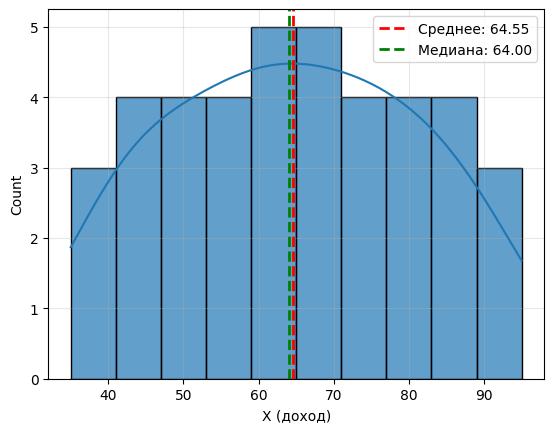


Выборочные статистики:
count    40.000000
mean     64.550000
std      16.680943
min      35.000000
25%      51.500000
50%      64.000000
75%      77.250000
max      95.000000
Name: X (доход), dtype: float64

Число уникальных значений: 	40


In [34]:
salary = data['X (доход)']
analyze_numerical_column(salary)

1. 'Высшее': 15 записей
2. 'Послевузовское': 15 записей
3. 'Среднее': 10 записей


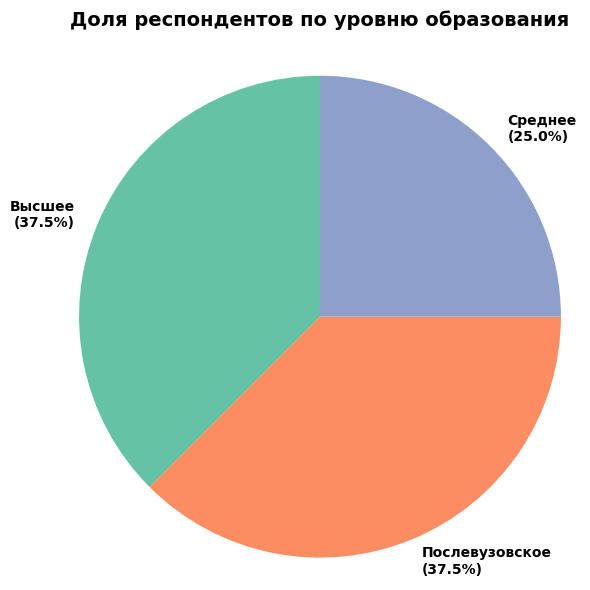

In [35]:
"Рассмотрим данные по образованию"
replace_map = {
    1: "Среднее",
    2: "Высшее",
    3: "Послевузовское"
}
education = data['Y'].replace(replace_map)
analyze_categorial_column(education, title='Доля респондентов по уровню образования')

In [36]:
salary_s = salary[education == "Среднее"]
salary_h = salary[education == "Высшее"]
salary_p = salary[education == "Послевузовское"]

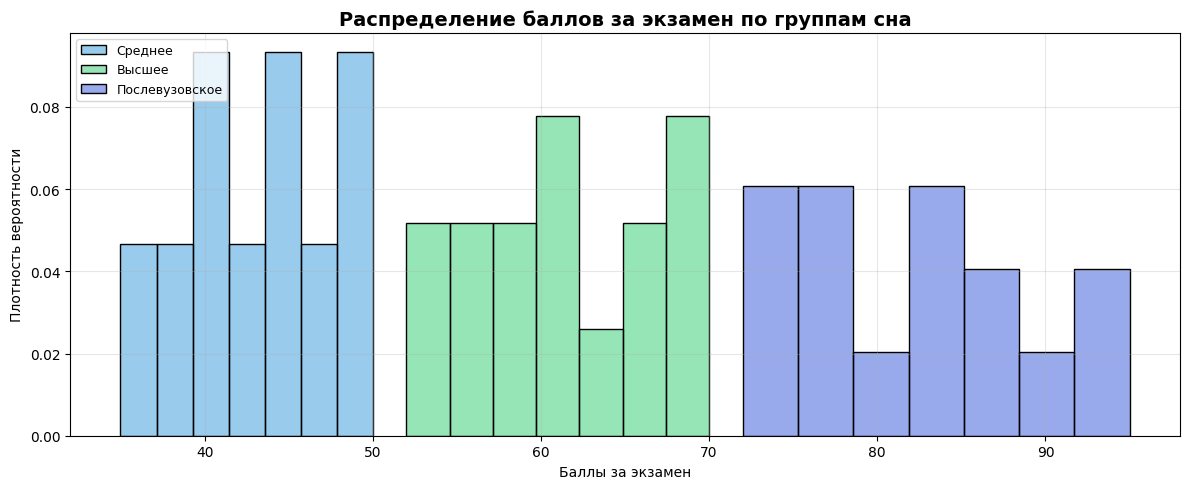

In [37]:
"ГИСТОГРАММЫ"
labels = ['Среднее', 'Высшее', 'Послевузовское']
salary_list = [salary_s, salary_h, salary_p]
colors = ['#3498db', '#2ecc71', '#3456db']
fig1, ax1 = plt.subplots(1, 1, figsize=(12, 5))
for scores, color, label in zip(salary_list, colors, labels):
    sns.histplot(data=scores, bins=7, color=color,
                 alpha=0.5, label=label, stat='density')

ax1.set_title('Распределение баллов за экзамен по группам сна',
              fontsize=14, fontweight='bold')
ax1.set_xlabel('Баллы за экзамен')
ax1.set_ylabel('Плотность вероятности')
ax1.legend(fontsize=9, loc='upper left')
ax1.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [38]:
"тест использует поправки на связки одинаковых распределений"
res = stats.spearmanr(salary, data['Y'])
res.statistic

np.float64(0.9377931061506664)

In [39]:
"можно в качестве эвристики взглянуть на выборочный коэффициент корреляции"
res = stats.pearsonr(salary, data['Y'])
res.statistic

np.float64(0.9337748439811207)


Shapiro-Wilk test: p-value = 0.3744



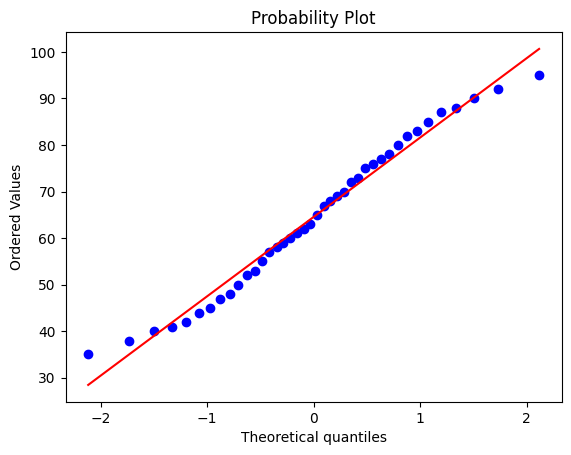

In [40]:
"проверим нормальность выборки"
_, p_value = stats.shapiro(salary)
print(f"\nShapiro-Wilk test: p-value = {p_value:.4f}\n")

stats.probplot(salary, dist="norm", plot=plt)
plt.show()

In [41]:
"Сравним среднюю зп между высшим и средним образованием"
_, p_value = stats.ttest_ind(salary_s, salary_h, equal_var=False)

print(f"t test: p-value: {p_value}")

t test: p-value: 1.4419357426803083e-08


In [42]:
"Сравним среднюю зп между высшим и посвлевузовским образованием"
_, p_value = stats.ttest_ind(salary_h, salary_p, equal_var=False)

print(f"t test: p-value: {p_value}")

t test: p-value: 1.9804528745739584e-09


# **Задача 2 (Влияние стажа на заработную плату)**

Описание переменных

- $X$ — Стаж работы, лет (количественная)
- $Y$ — Доход, тыс. руб. в месяц (количественная)

Парная выборка ($n = 40$)

Влияет ли стаж работы на зарплату?

In [43]:
!gdown 1G4sGchdUFSig5kSSMKYncLjdR6cDMPf2

Downloading...
From: https://drive.google.com/uc?id=1G4sGchdUFSig5kSSMKYncLjdR6cDMPf2
To: /content/corr_exp_salary.csv
100% 266/266 [00:00<00:00, 1.16MB/s]


In [44]:
"Читаем данные"
data = pd.read_csv("corr_exp_salary.csv")

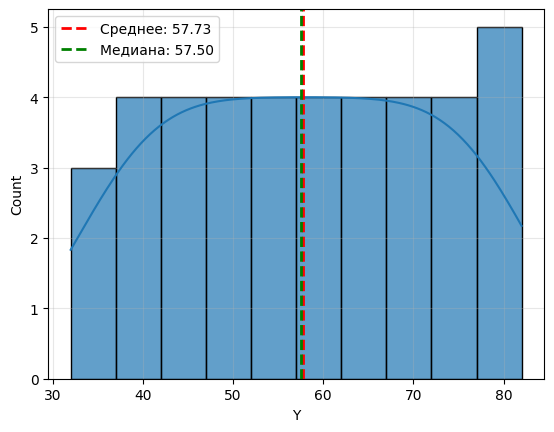


Выборочные статистики:
count    40.000000
mean     57.725000
std      14.665479
min      32.000000
25%      45.750000
50%      57.500000
75%      70.250000
max      82.000000
Name: Y, dtype: float64

Число уникальных значений: 	40


In [45]:
salary = data['Y']
analyze_numerical_column(salary)


Shapiro-Wilk test: p-value = 0.1507



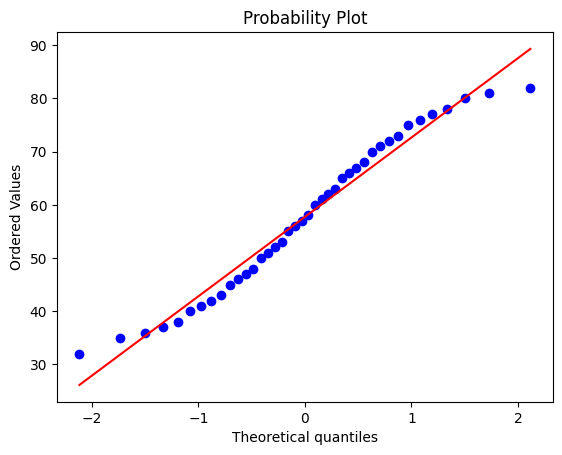

In [46]:
"проверим нормальность выборки"
_, p_value = stats.shapiro(salary)
print(f"\nShapiro-Wilk test: p-value = {p_value:.4f}\n")

stats.probplot(salary, dist="norm", plot=plt)
plt.show()

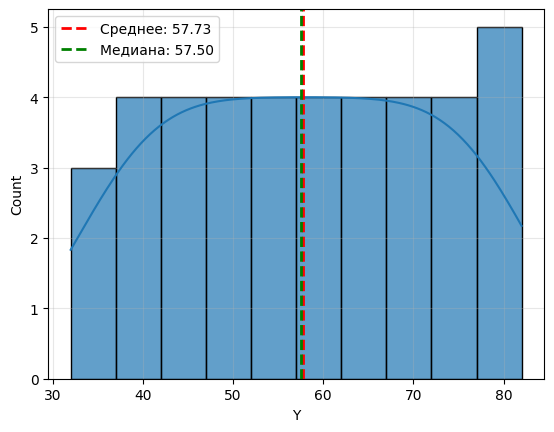


Выборочные статистики:
count    40.000000
mean     57.725000
std      14.665479
min      32.000000
25%      45.750000
50%      57.500000
75%      70.250000
max      82.000000
Name: Y, dtype: float64

Число уникальных значений: 	40


In [47]:
exp = data['X']
analyze_numerical_column(exp)

In [48]:
"Проверим некоррелированность"
rho, p_value = stats.spearmanr(salary, exp)
print(f'Spearman statistic: \trho = {rho}')
print(f'Spearman test: \tp-value = {p_value}')

Spearman statistic: 	rho = 0.999108420554303
Spearman test: 	p-value = 7.559462510535919e-54



Shapiro-Wilk test: p-value = 0.1307



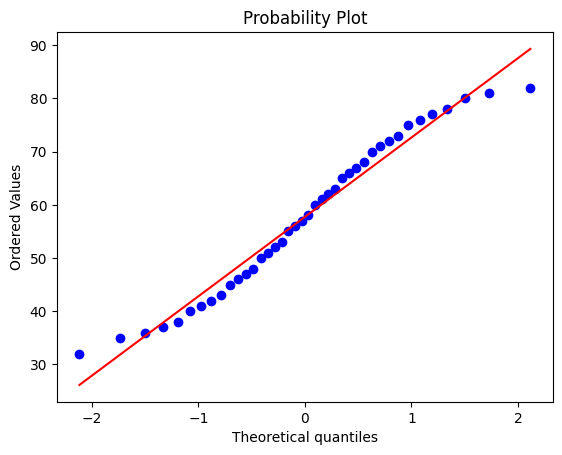

In [49]:
"проверим нормальность выборки"
_, p_value = stats.shapiro(exp)
print(f"\nShapiro-Wilk test: p-value = {p_value:.4f}\n")

stats.probplot(salary, dist="norm", plot=plt)
plt.show()

In [50]:
"тут можно уверенно пользоваться тестом на коэффициент Пирсона"
corr_exp, p_value = stats.pearsonr(salary, exp)
corr_exp, p_value
print(f'Pearson statistic: \tr = {corr_exp}')
print(f'Pearson test: \tp-value = {p_value}')

Pearson statistic: 	r = 0.9992262720440424
Pearson test: 	p-value = 5.11758744220388e-55


# Таблицы сопряжённости

> В *номинальных* шкалах измерения представляют собой метки, обозначающие принадлежность измерения определенной градации измеряемого признака.
> Никаких содержательных соотношений кроме $x = y$ или $x \neq y$ между значениями в этих шкалах нет.

> Для проверки независимости качественных признаков $A$ и $B$, то есть признаков, измеряемых в номинальных шкалах, применяются *таблицы сопряженности*.
>
> Пусть имеются два качественных признака $A$ и $B$. Признак $A$ имеет $r$ градаций: $A_1, \ldots, A_r$, признак $B$ имеет $s$ градаций $B_1, \ldots, B_s$. По выборке из $n$ случайно выбранных объектов можно составить таблицу сопряженности:
>
> |        | $B_1$ | $B_2$ | $\dots$ | $B_s$ | Сумма |
> |--------|---------|---------|-----------|---------|-------|
> | $A_1$ | $n_{11}$ | $n_{12}$ | $\dots$ | $n_{1s}$ | $m_1$ |
> | $A_2$ | $n_{21}$ | $n_{22}$ | $\dots$ | $n_{2s}$ | $m_2$ |
> | $\dots$ | $\dots$ | $\dots$ | $\dots$ | $\dots$ | $\dots$ |
> | $A_r$ | $n_{r1}$ | $n_{r2}$ | $\dots$ | $n_{rs}$ | $m_r$ |
> | Сумма  | $n_1$ | $n_2$ | $\dots$ | $n_s$ | $n$ |
>
> где $n_{ij}$ — количество элементов в выборке, обладающих одновременно свойствами $A_i$ и $B_j$. Приведенная таблица называется _таблицей сопряженности_. Справедливы равенства:
>
> \begin{align*}
 &\sum_{i=1}^r n_{ij} = n_j, \\
 &\sum_{j=1}^s n_{ij} = m_i, \\
 &\sum_{i=1}^r \sum_{j=1}^s n_{ij} = \sum_{j=1}^s n_j = \sum_{i=1}^r m_i = n
\end{align*}
> Здесь $n_j$ — количество объектов, обладающих свойством $B_j$, а $m_i$ — обладающих свойством $A_i$.

In [51]:
"Рассмотрим следующую таблицу сопряженности (данные сгенерированы)"
data = {
    'Полная': [18, 26, 15],
    'Частичная': [12, 10, 6],
    'Фриланс': [6, 14, 18],
    'Безработный': [9, 5, 6]
}

df = pd.DataFrame(data,
                  index=['Среднее', 'Высшее', 'Послевузовское'])
df

,Полная,Частичная,Фриланс,Безработный
Среднее,18,12,6,9
Высшее,26,10,14,5
Послевузовское,15,6,18,6


> Пусть $p_i = P(A_i), \, i = 1, \ldots, r$ и $q_j = P(B_j), \, j = 1, \ldots, s$. При этом
> \begin{equation}
\sum_{i=1}^r p_i = 1, \, \sum_{j=1}^s q_j = 1.
\end{equation}
> Признаки $A$ и $B$ называются независимыми, если при любых $i$ и $j$ выполняется равенство:
> \begin{equation}
p_{ij} = P(A_i \cap B_j) = p_i q_j.
\end{equation}
>
> Очевидно, что
> \begin{equation}
\sum_{i=1}^r p_{ij} = q_j, \, \sum_{j=1}^s p_{ij} = p_i.
\end{equation}
> Сформулируем гипотезу независимости и альтернативную ей гипотезу (предположение: измерений много):
>
> - $H_0$: $P(A_i \cap B_j) = p_i q_j$ для любых $i, j$.
> - $H_1$: существует пара $(i, j)$ такая, что $P(A_i \cap B_j) \neq p_i q_j$.
> Гипотеза $H_0$ представляет собой гипотезу независимости двух признаков.

In [52]:
"Проверяем гипотезу о независимости"
chi2_stat, p_value, degrees_of_freedom,\
 expected_frequancy = stats.chi2_contingency(df.values)
print(f"Chi-Square test: p-value: {p_value:0.6f}")

Chi-Square test: p-value: 0.071785


# **Задача 3 (Влияние образования на уровень занятости)**

- Переменная $X$ — Уровень образования
  - $1$ — Среднее
  - $2$ — Высшее
  - $3$ — Послевузовское
- Переменная $Y$ — Тип занятости
  - $1$ — Полная занятость
  - $2$ — Частичная занятость
  - $3$ — Фриланс
  - $4$ — Безработный

Парная выборка ($n = 40$)

Как влияет уровень образования на тип занятости?

In [53]:
!gdown 1U-Do2OorgCH-QS6MW9xhmYvzhaIDtLbA

Downloading...
From: https://drive.google.com/uc?id=1U-Do2OorgCH-QS6MW9xhmYvzhaIDtLbA
To: /content/corr_edu_occup.csv
100% 203/203 [00:00<00:00, 972kB/s]


In [54]:
data = pd.read_csv("corr_edu_occup.csv")
print(data.head(3))
X = data['X']
Y = data['Y']

   X  Y
0  1  1
1  1  2
2  1  1


1. 'Высшее': 14 записей
2. 'Среднее': 13 записей
3. 'Послевузовское': 13 записей


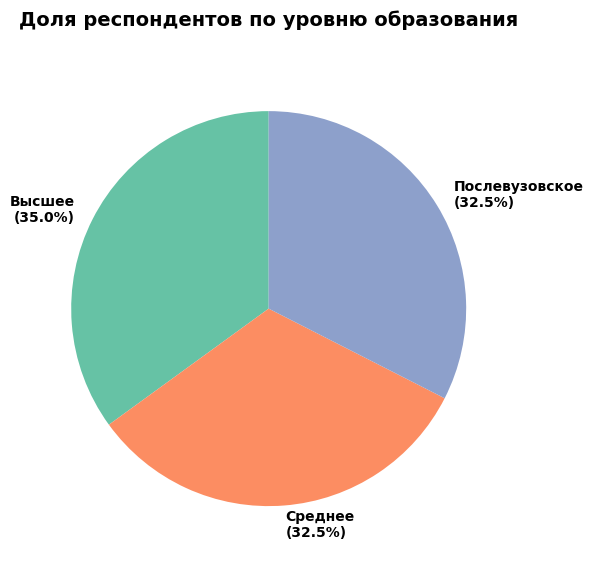

In [55]:
"Данные по уровню образования"
replace_map = {
    1: "Среднее",
    2: "Высшее",
    3: "Послевузовское"
}
education = data['X'].replace(replace_map)
analyze_categorial_column(education, title='Доля респондентов по уровню образования')

1. 'Полная занятость': 16 записей
2. 'Фриланс': 11 записей
3. 'Частичная занятость': 9 записей
4. 'Безработный': 4 записей


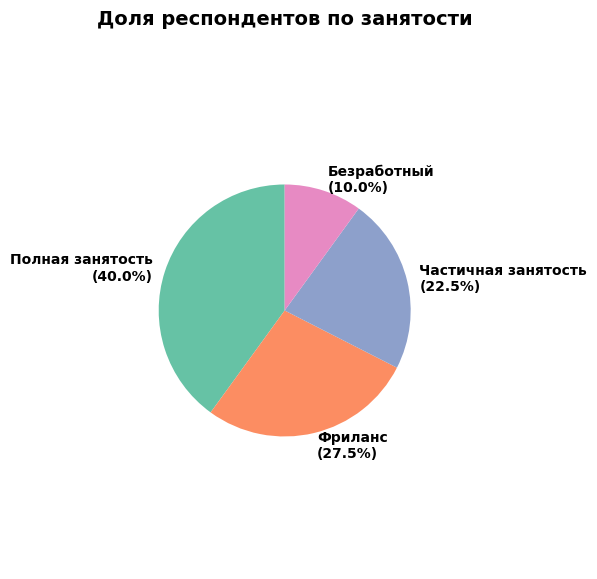

In [56]:
"Данные по занятости"
replace_map = {
    1: "Полная занятость",
    2: "Частичная занятость",
    3: "Фриланс",
    4: "Безработный"
}
employment = data['Y'].replace(replace_map)
analyze_categorial_column(employment, title="Доля респондентов по занятости")

In [57]:
"Проверяем гипотезу о независимости"
result = stats.chi2_contingency(pd.crosstab(education, employment))
print(f"Chi-Square test: p-value: {result.pvalue:0.6f}")

Chi-Square test: p-value: 0.420014
